In [98]:
import numpy as np
import xarray as xr
import gsw
import os.path as op
from scipy import fftpack as fft
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
%matplotlib inline

In [49]:
from oceanmodes.baroclinic import neutral_modes_from_N2_profile as neut 
from oceanmodes.baroclinic import instability_analysis_from_N2_profile as insta

Generate exponential background profiles for $u$, $v$ and $N2$.

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


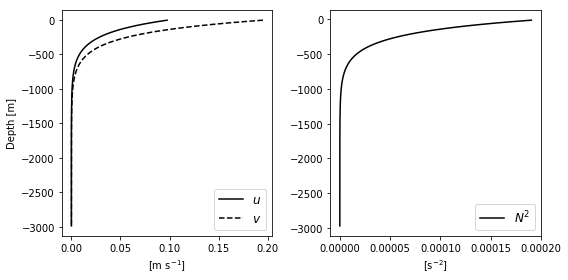

In [116]:
dz = 20.
z = -np.arange(5.,3e3,dz)
z_t = -np.arange(10.,3e3-dz,dz)
u = 0.1*np.exp(.005*z)
v = 0.2*np.exp(.005*z)
N2 = 2e-4*np.exp(.005*z_t)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.set_tight_layout(True)
ax1.plot(u,z,'k',label=r"$u$")
ax1.plot(v,z,'k--',label=r"$v$")
ax2.plot(N2,z_t,'k',label=r"$N^2$")
ax1.set_ylabel(r'Depth [m]')
ax1.set_xlabel(r'[m s$^{-1}$]')
ax2.set_xlabel(r'[s$^{-2}$]')
ax1.legend(loc='lower right', fontsize=12)
ax2.legend(loc='lower right', fontsize=12)

In [89]:
f0 = 1e-4
beta = 1e-11

# Rossby deformation radius

In [95]:
kwargs = {'num_eigen': 2, 'init_vector': None, 'num_Lanczos': len(z)*10, 'iteration': len(z)*100, 'tolerance': 0}
zphi, Rd, vd = neut(np.abs(z_t), N2, f0, **kwargs)
Rd

array([2.07955555e+09, 2.14740536e+04])

$R_d$ is the Rossby radii vector and $v_d$ are the eigen vectors.

# Baroclinic instability growth rates

In [96]:
k = 2.*np.pi*fft.fftshift(fft.fftfreq(50, d=4e3))
l = 2.*np.pi*fft.fftshift(fft.fftfreq(50, d=4e3))
zpsi, w, psi = insta(np.abs(z_t), N2, f0, beta, k, l, np.abs(z), u, v, 
                     np.zeros(2), np.zeros(2), sort='LI', num=2)

Text(0.5,1,'$\\psi$')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


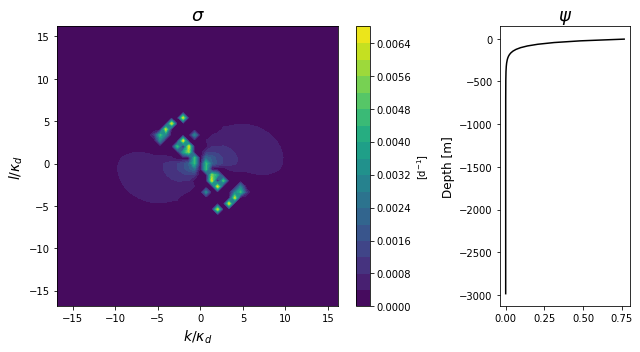

In [117]:
fig = plt.figure(figsize=(9,5))
fig.set_tight_layout(True)
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2])
cax = ax1.contourf(k*Rd[1], l*Rd[1], w.imag[0]*86400, 20)
cbar = fig.colorbar(cax, ax=ax1, orientation='vertical')
cbar.set_label(r"[d$^{-1}$]")
ax1.set_xlabel(r'$k/\kappa_d$', fontsize=14)
ax1.set_ylabel(r'$l/\kappa_d$', fontsize=14)
ax1.set_title(r'$\sigma$', fontsize=18)
ax2.plot(np.reshape(np.absolute(psi[:, 0]), 
                   (len(zpsi), psi.shape[-1]**2)
                   )[:, np.argmax(w.imag[0])], -zpsi, 'k')
ax2.set_ylabel(r'Depth [m]', fontsize=12)
ax2.set_title(r'$\psi$', fontsize=18)

The left panel above shows the baroclinic growth rate ($\sigma$) in inverse days plotted against the zonal and meridional wavenumbers normalized by the first deformation radius. The right panel shows the vertical profile of the most unstable mode ($\psi$) plotted against depth.

In [119]:
0.59*np.exp(4040/278.15)

1198887.2323593404